In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('human.xlsx')

In [4]:
df1 =  pd.read_excel('human_new.xlsx')

# 1. 데이터 정제

In [5]:
# 컬럼명 영문전환
df.columns = [ 'id' , 'age' , 'grade' , 'fnlwgt' , 'school' , 'edu' , 'married' , 'job' , 'relation' , 'color' , 'sex' , 'money' , 'loss' , 'time' , 'mothernation']
df1.columns = [ 'id' , 'age' , 'grade' , 'fnlwgt' , 'school' , 'edu' , 'married' , 'job' , 'relation' , 'color' , 'money' , 'loss' , 'time' , 'mothernation']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
id              32561 non-null object
age             32561 non-null int64
grade           30725 non-null object
fnlwgt          32561 non-null int64
school          32561 non-null object
edu             32561 non-null int64
married         32561 non-null object
job             30718 non-null object
relation        32561 non-null object
color           32561 non-null object
sex             32561 non-null object
money           32561 non-null int64
loss            32561 non-null int64
time            32561 non-null int64
mothernation    31978 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 1-1. 결측값 제거

In [7]:
df.isnull().sum()

id                 0
age                0
grade           1836
fnlwgt             0
school             0
edu                0
married            0
job             1843
relation           0
color              0
sex                0
money              0
loss               0
time               0
mothernation     583
dtype: int64

In [8]:
df1.isnull().sum()

id                0
age               0
grade           963
fnlwgt            0
school            0
edu               0
married           0
job             966
relation          0
color             0
money             0
loss              0
time              0
mothernation    274
dtype: int64

### 결측값 ( 일자리, 출신 지역, 학벌 그냥 0으로 대체 )

In [9]:
df = df.fillna(0)
df1 = df1.fillna(0)

### 출신학교에 Privacy 있어서 이것도 그냥 0으로 대체

In [ ]:
df.map(lambda x : x.replace(' Privacy' ,'0'))

In [10]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [11]:
df.head(2)

,id,age,grade,fnlwgt,school,edu,married,job,relation,color,sex,money,loss,time,mothernation
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [12]:
# id 앞에 H 제거하기

In [13]:
obj = ['id', 'grade', 'school', 'married', 'job', 'relation' , 'color','sex','mothernation']
df[obj] = df[obj].apply(lambda x: x.astype('category').cat.codes)

In [ ]:
## 컬럼 순서 똑같이 바꾸기

In [14]:
df = df[['id', 'age', 'grade', 'fnlwgt', 'school', 'edu', 'married', 'job',
       'relation', 'color', 'money', 'loss', 'time', 'mothernation', 'sex']]

In [15]:
df1 = df[['id', 'age', 'grade', 'fnlwgt', 'school', 'edu', 'married', 'job',
       'relation', 'color', 'money', 'loss', 'time', 'mothernation', 'sex']]

## 2. 시각화

In [16]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fm.get_fontconfig_fonts()
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()


plt.rc('font', family=font_name)

C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


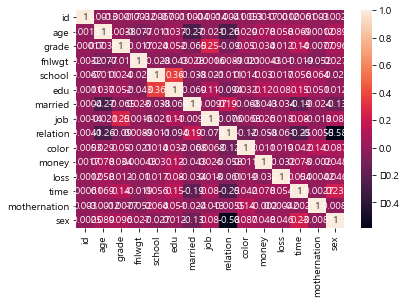

In [17]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

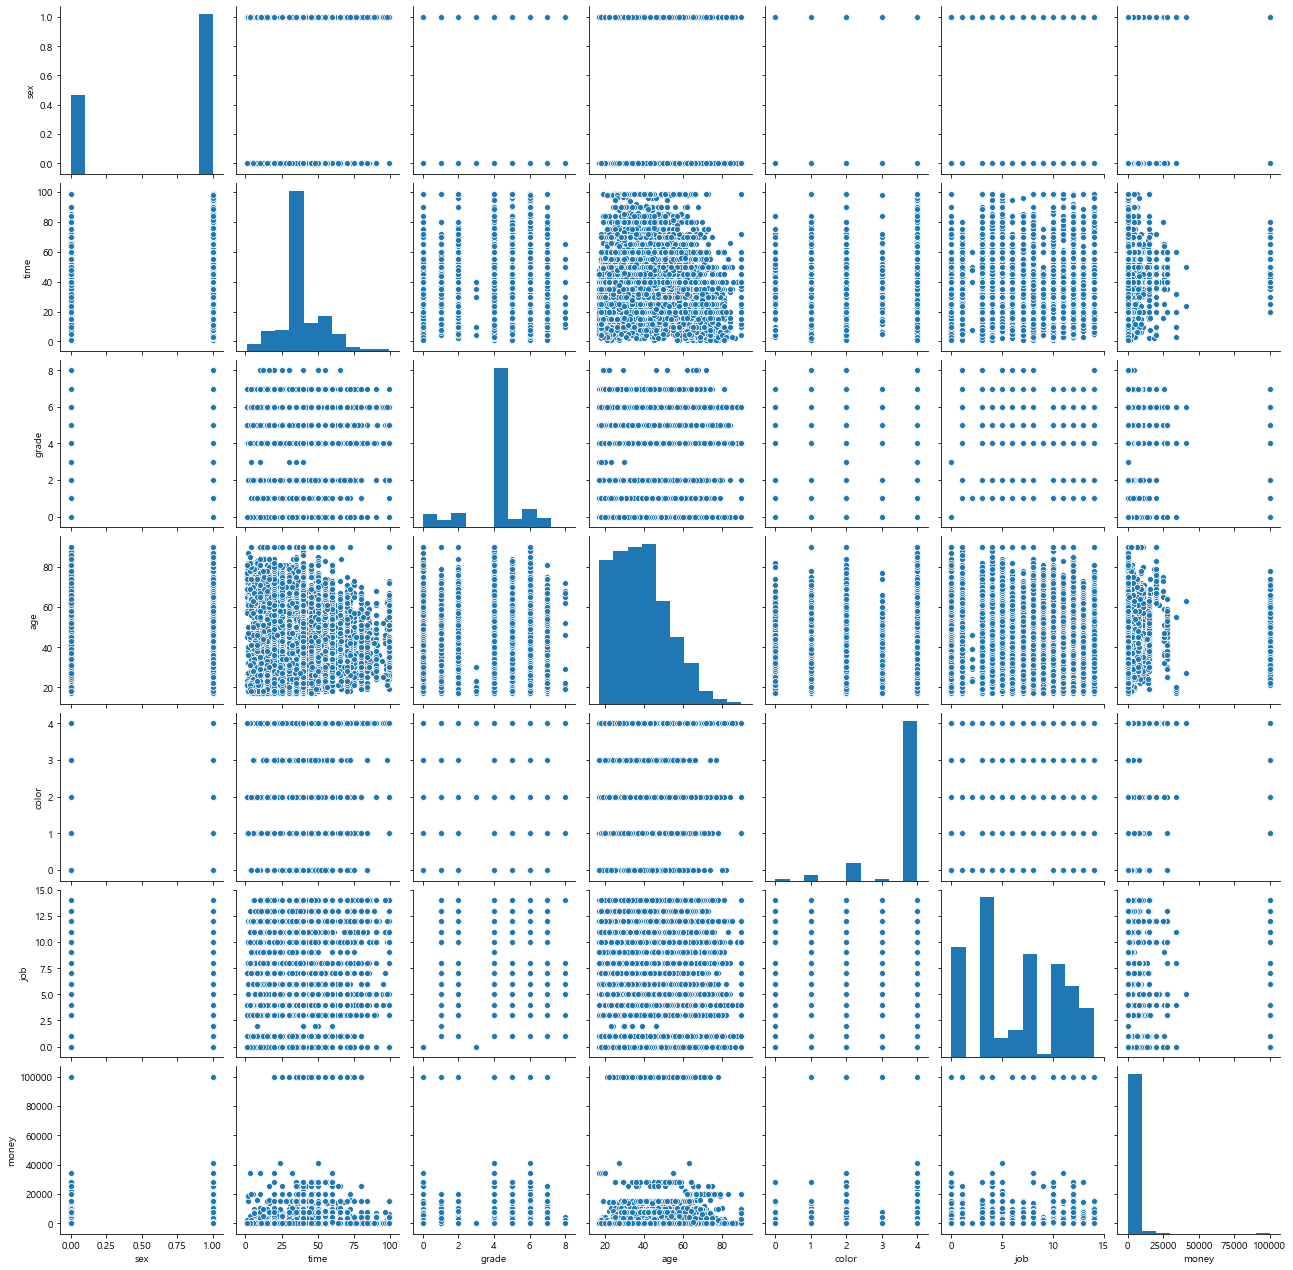

In [21]:
sns.pairplot(df[["sex", 'time' , 'grade' , 'age' , 'color' , 'job' , 'money' ]])
plt.show()

In [18]:
df.corr().sex.sort_values(ascending=False)

sex             1.000000
time            0.229309
grade           0.095981
age             0.088832
color           0.087204
job             0.080296
money           0.048480
loss            0.045567
fnlwgt          0.026858
edu             0.012280
id             -0.002472
mothernation   -0.008119
school         -0.027356
married        -0.129314
relation       -0.582454
Name: sex, dtype: float64

### Del Col 해서 연관성 마이너스 지워주기

In [19]:
d_col = ['relation' , 'married' , 'school' , 'mothernation' ]

In [20]:
df=df.drop(d_col,axis=1)
df1=df1.drop(d_col,axis=1)

# 3. 모델 예측

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import glob
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from matplotlib import font_manager, rc
import warnings
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import *
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# !pip install xgboost
warnings.filterwarnings('ignore')
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')

fm.get_fontconfig_fonts()
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from xgboost import plot_importance
%matplotlib inline

Using TensorFlow backend.


In [23]:
# 파라미터 서치
def bestGBDTNextModel(model, isKfold, nfold, searchCV, Xtrain, ytrain, Xtest, ytest, nIter, scoring, errScore, verbose, nJobs):
    # GridSearchCV을 위해 파라미터 값을 제한함.
    grd_prams = {}
    classifier = XGBClassifier(random_state=0, objective='binary:logistic')
    cv = KFold(n_splits=nfold, shuffle=True, random_state=0)
    
    if model == 'LGBM':
        # 그래디언트 부스팅 결정 트리(GBDT)    
        grd_prams.update({'max_depth': [50, 100],
              'learning_rate' : [0.01, 0.05],
              'num_leaves': [150, 200],
              'n_estimators': [300, 400],
              'num_boost_round':[4000, 5000],
              'subsample': [0.5, 1],
              'reg_alpha': [0.01, 0.1],
              'reg_lambda': [0.01, 0.1],
              'min_data_in_leaf': [20, 30],
              'lambda_l1': [0.01, 0.1],
              'lambda_l2': [0.01, 0.1]
            })
        
        #grd_prams.update({'max_depth': [50, 75, 90, 100],
        #      'learning_rate' : [0.01, 0.05, 0.07, 0.1],
        #      'num_leaves': [300,600,900,1200],
        #      'n_estimators': [100, 300, 500, 900],
        #      'num_boost_round':[1000, 2000, 3000, 4000],
        #      'num_leaves': [30, 60, 120, 150, 200],
        #      'reg_alpha': [0.01, 0.1, 0.5, 0.7, 1.0],
        #      'min_data_in_leaf': [50, 100, 300, 800],
        #      'lambda_l1': [0, 0.1, 0.5, 1.0],
        #      'lambda_l2': [0, 0.01, 1.0]})
        
        classifier = LGBMClassifier(random_state=0, boosting_type='gbdt', objective='binary', metric='auc')
        
    elif model == 'XGB':
        grd_prams.update({'n_estimators': [300, 500],
            'learning_rate': [0.001, 0.01],
            'subsample': [0.5, 1],
            'max_depth': [5, 6],
            'colsample_bytree': [0.97, 1.24],
            'min_child_weight': [1, 2],
            'gamma': [0.001, 0.005],
            'nthread': [3, 4],
            'reg_lambda': [0.5, 1.0],
            'reg_alpha': [0.01, 0.1]
          })
        
        #grd_prams.update({'n_estimators': [300, 500, 700],
        #    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
        #    'subsample': [0.5, 1],
        #    'max_depth': [4, 5, 6, 7, 8, 9, 10],
        #    'colsample_bytree': [0.52, 0.97, 1,55, 2.32, 3.46],
        #    'min_child_weight': [1, 2, 3, 4],
        #    'gamma': [0.001, 0.01, 0.1, 0, 1],
        #    'nthread': [3, 4, 5],
        #    'reg_lambda': [0.01, 0.1, 0.5, 0.7, 1.0],
        #    'reg_alpha': [0.01, 0.1, 0.5, 0.7, 1.0]
        #  })
    
    if isKfold == False:
        cv = StratifiedShuffleSplit(n_splits=nfold, test_size=0.2, random_state=0)
    
    grid_ = RandomizedSearchCV(classifier, param_distributions=grd_prams, n_iter=nIter, scoring=scoring, error_score=errScore, verbose=verbose, n_jobs=nJobs, cv=cv)

    # 속도 이슈
    if searchCV == 'GRID': 
        grid_ = GridSearchCV(classifier, param_grid=grd_prams, n_jobs=nJobs, scoring=scoring, verbose=verbose, cv=cv)
    
    grid_.fit(Xtrain, ytrain)
    score_ = grid_.score(Xtest, ytest)
    
    #best = {"best_param":grid_.best_params_, 
    #        "best_score":grid_.best_score_, 
    #        "best_estimator":grid_.best_estimator_,
    #        "test_score":score_
    #       }
    
    print("{} grid_.best_score {}".format(model, np.round(grid_.best_score_,3)))
    print("{} grid_.best_score {}".format(model, np.round(score_,3)))
    print("{} best_estimator {}".format(model, grid_.best_estimator_))

    return grid_.best_params_

### df1에 sex 값 전부 2로 채워 버림

In [25]:
df1['sex'] = 2

In [26]:
df.head(1)

,id,age,grade,fnlwgt,edu,job,color,money,loss,time,sex
0,0,39,7,77516,13,1,4,2174,0,40,1


In [27]:
train = df
test=df1

In [28]:
display(train.head())
display(test.head())

,id,age,grade,fnlwgt,edu,job,color,money,loss,time,sex
0,0,39,7,77516,13,1,4,2174,0,40,1
1,1,50,6,83311,13,4,4,0,0,13,1
2,2,38,4,215646,9,6,4,0,0,40,1
3,3,53,4,234721,7,6,2,0,0,40,1
4,4,28,4,338409,13,10,2,0,0,40,0


,id,age,grade,fnlwgt,edu,job,color,money,loss,time,sex
0,0,39,7,77516,13,1,4,2174,0,40,2
1,1,50,6,83311,13,4,4,0,0,13,2
2,2,38,4,215646,9,6,4,0,0,40,2
3,3,53,4,234721,7,6,2,0,0,40,2
4,4,28,4,338409,13,10,2,0,0,40,2


In [29]:
t_final = df1.copy()
t_final.head(2)

,id,age,grade,fnlwgt,edu,job,color,money,loss,time,sex
0,0,39,7,77516,13,1,4,2174,0,40,2
1,1,50,6,83311,13,4,4,0,0,13,2


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import glob

In [31]:
kfold = StratifiedKFold(n_splits=5) # 하이퍼 파라미터 지정
n_it = 12

In [32]:
X=train.drop(['id','sex'],axis=1)
y=train.sex.values

In [33]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, learning_curve

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score, roc_auc_score
import scikitplot as skplt

In [ ]:
test = test.drop(['sex','id'],axis=1)
train_target = train.sex.values
train=train.drop(['sex','id'],axis=1)

In [35]:
train_target

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train, train_target, test_size=0.25, random_state=0)

In [37]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24420, 9) (8141, 9) (24420,) (8141,)


In [38]:
print(train.shape, test.shape)

(32561, 9) (32561, 9)


In [39]:
params = {'max_features':list(np.arange(1, df.shape[1])), 'bootstrap':[False], 'n_estimators': [50], 'criterion':['gini','entropy']}
model = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=n_it, cv=kfold, scoring='roc_auc',n_jobs=-1, verbose=1)
print('MODELING.............................................................................')
model.fit(train, train_target)
print('========BEST_AUC_SCORE = ', model.best_score_)
model = model.best_estimator_

MODELING.............................................................................
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


========BEST_AUC_SCORE =  0.7571780149346037


In [40]:
# 파라미터 서치
def bestGBDTNextModel(model, isKfold, nfold, searchCV, Xtrain, ytrain, Xtest, ytest, nIter, scoring, errScore, verbose, nJobs):
    # GridSearchCV을 위해 파라미터 값을 제한함.
    grd_prams = {}
    classifier = XGBClassifier(random_state=0, objective='binary:logistic')
    cv = KFold(n_splits=nfold, shuffle=True, random_state=0)
    
    if model == 'LGBM':
        # 그래디언트 부스팅 결정 트리(GBDT)    
        grd_prams.update({'max_depth': [50, 100],
              'learning_rate' : [0.01, 0.05],
              'num_leaves': [150, 200],
              'n_estimators': [300, 400],
              'num_boost_round':[4000, 5000],
              'subsample': [0.5, 1],
              'reg_alpha': [0.01, 0.1],
              'reg_lambda': [0.01, 0.1],
              'min_data_in_leaf': [20, 30],
              'lambda_l1': [0.01, 0.1],
              'lambda_l2': [0.01, 0.1]
            })
        
        #grd_prams.update({'max_depth': [50, 75, 90, 100],
        #      'learning_rate' : [0.01, 0.05, 0.07, 0.1],
        #      'num_leaves': [300,600,900,1200],
        #      'n_estimators': [100, 300, 500, 900],
        #      'num_boost_round':[1000, 2000, 3000, 4000],
        #      'num_leaves': [30, 60, 120, 150, 200],
        #      'reg_alpha': [0.01, 0.1, 0.5, 0.7, 1.0],
        #      'min_data_in_leaf': [50, 100, 300, 800],
        #      'lambda_l1': [0, 0.1, 0.5, 1.0],
        #      'lambda_l2': [0, 0.01, 1.0]})
        
        classifier = LGBMClassifier(random_state=0, boosting_type='gbdt', objective='binary', metric='auc')
        
    elif model == 'XGB':
        grd_prams.update({'n_estimators': [300, 500],
            'learning_rate': [0.001, 0.01],
            'subsample': [0.5, 1],
            'max_depth': [5, 6],
            'colsample_bytree': [0.97, 1.24],
            'min_child_weight': [1, 2],
            'gamma': [0.001, 0.005],
            'nthread': [3, 4],
            'reg_lambda': [0.5, 1.0],
            'reg_alpha': [0.01, 0.1]
          })
        
        #grd_prams.update({'n_estimators': [300, 500, 700],
        #    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
        #    'subsample': [0.5, 1],
        #    'max_depth': [4, 5, 6, 7, 8, 9, 10],
        #    'colsample_bytree': [0.52, 0.97, 1,55, 2.32, 3.46],
        #    'min_child_weight': [1, 2, 3, 4],
        #    'gamma': [0.001, 0.01, 0.1, 0, 1],
        #    'nthread': [3, 4, 5],
        #    'reg_lambda': [0.01, 0.1, 0.5, 0.7, 1.0],
        #    'reg_alpha': [0.01, 0.1, 0.5, 0.7, 1.0]
        #  })
    
    if isKfold == False:
        cv = StratifiedShuffleSplit(n_splits=nfold, test_size=0.2, random_state=0)
    
    grid_ = RandomizedSearchCV(classifier, param_distributions=grd_prams, n_iter=nIter, scoring=scoring, error_score=errScore, verbose=verbose, n_jobs=nJobs, cv=cv)

    # 속도 이슈
    if searchCV == 'GRID': 
        grid_ = GridSearchCV(classifier, param_grid=grd_prams, n_jobs=nJobs, scoring=scoring, verbose=verbose, cv=cv)
    
    grid_.fit(Xtrain, ytrain)
    score_ = grid_.score(Xtest, ytest)
    
    #best = {"best_param":grid_.best_params_, 
    #        "best_score":grid_.best_score_, 
    #        "best_estimator":grid_.best_estimator_,
    #        "test_score":score_
    #       }
    
    print("{} grid_.best_score {}".format(model, np.round(grid_.best_score_,3)))
    print("{} grid_.best_score {}".format(model, np.round(score_,3)))
    print("{} best_estimator {}".format(model, grid_.best_estimator_))

    return grid_.best_params_

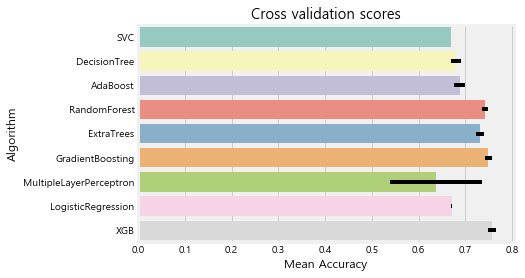

In [41]:
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(XGBClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","LogisticRegression",'XGB']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
# scoring="roc_auc|f1" => 0.755
# categories_indices = [X_train.columns.get_loc(col) for col in ['주구매코너']]
best_param1 = bestGBDTNextModel('LGBM', False, 5, 'RANDOM', X_train, y_train, X_test, y_test, 15, 'roc_auc', 0, 3, -1)
lgbm1 = LGBMClassifier(**best_param1)
score_lgbm1 = lgbm1.fit(X_train, y_train).score(X_test, y_test)
print("score_lgbm1 ::: {}".format(score_lgbm1))
print("-----------------------------------")
y_lgbm1 = lgbm1.predict(X_test)
print(classification_report(y_test, y_lgbm1))

# 최고=0.755 Score LGBM best_estimator
#  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#         importance_type='split', lambda_l1=0.01, lambda_l2=0,
#         learning_rate=0.01, max_depth=50, metric='auc',
#         min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
#         min_split_gain=0.0, n_estimators=300, n_jobs=-1,
#         num_boost_round=4000, num_leaves=150, objective='binary',
#         random_state=0, reg_alpha=0.1, reg_lambda=0.0, silent=True,
#         subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
best_model1 = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lambda_l1=0.1, lambda_l2=0.01,
               learning_rate=0.05, max_depth=50, metric='auc',
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=400,
               n_jobs=-1, num_boost_round=4000, num_leaves=200,
               objective='binary', random_state=0, reg_alpha=0.01,
               reg_lambda=0.1, silent=True, subsample=0.5,
               subsample_for_bin=200000, subsample_freq=0)

score_best1 = best_model1.fit(X_train, y_train).score(X_test, y_test)
y_best1 = best_model1.predict(X_test)

print("best_model1 -----------------------------{}".format(score_best1))
print(classification_report(y_test, y_best1))

In [ ]:
bestmodel = best_model1.predict(X_test)

import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Get the confusion matrix

CM = confusion_matrix(y_test, bestmodel)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("LGBM Classifier")
plt.show()

# 4. 모델 예측값 엑셀로 정리

In [ ]:
t_final.sex = best_model1.predict_proba(test.values)[:,1]

In [ ]:
t_final.sex = (t_final.sex).round()

In [ ]:
t_final.head(2)

In [ ]:
t_final.columns

In [ ]:
t_final.head(2)

In [ ]:
t_final1 = t_final.drop(['age', 'grade', 'fnlwgt', 'school', 'edu', 'married', 'job','relation', 'color', 'money', 'loss', 'time', 'mothernation'], axis=1)

In [ ]:
t_final1.head()

In [ ]:
t_final1.sex.value_counts()

In [ ]:
t_final1.sex = t_final1.sex.astype(int)

In [ ]:
t_final1.head()

In [ ]:
t_final1.to_excel('bmw.xlsx')